# Data analyzes I - basics in data handling

[Peer Herholz (he/him)](https://peerherholz.github.io/)  
Habilitation candidate  - [Fiebach Lab](http://www.fiebachlab.org/), [Neurocognitive Psychology](https://www.psychologie.uni-frankfurt.de/49868684/Abteilungen) at [Goethe-University Frankfurt](https://www.goethe-university-frankfurt.de/en?locale=en)    
Research affiliate - [NeuroDataScience lab](https://neurodatascience.github.io/) at [MNI](https://www.mcgill.ca/neuro/)/[McGill](https://www.mcgill.ca/)  
Member - [BIDS](https://bids-specification.readthedocs.io/en/stable/), [ReproNim](https://www.repronim.org/), [Brainhack](https://brainhack.org/), [Neuromod](https://www.cneuromod.ca/), [OHBM SEA-SIG](https://ohbm-environment.org/), [UNIQUE](https://sites.google.com/view/unique-neuro-ai)  

<img align="left" src="https://raw.githubusercontent.com/G0RELLA/gorella_mwn/master/lecture/static/Twitter%20social%20icons%20-%20circle%20-%20blue.png" alt="logo" title="Twitter" width="32" height="20" /> <img align="left" src="https://raw.githubusercontent.com/G0RELLA/gorella_mwn/master/lecture/static/GitHub-Mark-120px-plus.png" alt="logo" title="Github" width="30" height="20" />   &nbsp;&nbsp;@peerherholz 



## Before we get started ...
<br>

- most of what you’ll see within this lecture was prepared by Ross Markello, Michael Notter and Peer Herholz and further adapted for this course by Peer Herholz 
- based on Tal Yarkoni's ["Introduction to Python" lecture at Neurohackademy 2019](https://neurohackademy.org/course/introduction-to-python-2/)
- based on [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

## Objectives 📍

* learn basic and efficient usage of python for data analyzes & visualization
    * working with data: 
        * reading, working, writing
        * preprocessing, filtering, wrangling
    * visualizing data:
        * basic plots
        * advanced & fancy stuff

## Why do data science in Python?

* all the general benefits of the `Python language` (`open source`, fast, etc.)
    * Specifically, it's a **widely used/very flexible**, **high-level**, **general-purpose**, **dynamic** programming language
* the `Python ecosystem` contains tens of thousands of packages, several are very widely used in data science applications:
    * Jupyter: interactive notebooks
    * Numpy: numerical computing in Python
    * pandas: data structures for Python
    * pingouin: statistics in Python
    * statsmodels: statistics in Python    
    * seaborn: data visualization in Python    
    * plotly: interactive data visualization in Python    
    * Scipy: scientific Python tools
    * Matplotlib: plotting in Python
    * scikit-learn: machine learning in Python

* even more: `Python` has very good (often best-in-class) external packages for almost everything
* Particularly important for data science, which draws on a very broad toolkit
* Package management is easy (conda, pip)
* Examples for further important/central python data science packages :
    * Web development: flask, Django
    * Database ORMs: SQLAlchemy, Django ORM (w/ adapters for all major DBs)
    * Scraping/parsing text/markup: beautifulsoup, scrapy
    * Natural language processing (NLP): nltk, gensim, textblob
    * Numerical computation and data analysis: numpy, scipy, pandas, xarray
    * Machine learning: scikit-learn, Tensorflow, keras
    * Image processing: pillow, scikit-image, OpenCV
    * Plotting: matplotlib, seaborn, altair, ggplot, Bokeh
    * GUI development: pyQT, wxPython
    * Testing: py.test

### Widely-used
* Python is the fastest-growing major programming language
* Top 3 overall (with JavaScript, Java)

<center><img src="https://149351115.v2.pressablecdn.com/wp-content/uploads/2017/09/growth_major_languages-1-1400x1200.png" width="800px" style="margin-bottom: 10px;"></center>

What we will do in this section of the course is a _short_ introduction to `Python` for `data analyses` including basic `data operations` like `file reading` and `wrangling`, as well as `statistics` and `data visualization`. The goal is to showcase crucial tools/resources and their underlying working principles to allow further more in-depth exploration and direct application. 

It is divided into the following chapters:

- [Getting ready]()
- [Basic data operations]()
    - [Reading data]()
    - [Exploring data]()
    - [Data wrangling]()
- [Basic data visualization]()    
    - [Underlying principles]()
    - ["standard" plots]()
    - [Going further with advanced plots]()
- [Statistics in python]()
    - [Descriptive analyses]()
    - [Inferential analyses]()
- [Interactive data visualization]()

Here's what we will focus on in the first block:

- [Getting ready]()
- [Basic data operations]()
    - [Reading data]()
    - [Exploring data]()
    - [Data wrangling]()

## Getting ready

What's the first thing we have to check/evaluate before we start working with data, no matter if in `Python` or any other software? That's right: getting everything ready! 

This includes outlining the core workflow and respective steps. Quite often, this notebook and its content included, this entails the following:

1. What kind of data do I have and where is it?
2. What is the goal of the data analyses?
3. How will the respective steps be implemented?

So let's check these aspects out in slightly more detail.

### What kind of data do I have and where is it

The first crucial step is to get a brief idea of the kind of data we have, where it is, etc. to outline the subsequent parts of the workflow (`python modules` to use, analyses to conduct, etc.). At this point it's important to note that `Python` and its `modules` work tremendously well for basically all kinds of data out there, no matter if `behavior`, neuroimaging, etc. . To keep things rather simple, we will use a `behavioral dataset` that contains `ratings` and `demographic information` from a group of university students (ah, the classics...).

Knowing that all `data files` are located in a folder called `data_experiment` on our `desktop`, we will use the [os]() `module` to change our `current working directory` to our `desktop` to make things easier:

In [1]:
from os import chdir

chdir('/Users/peerherholz/Desktop/')

Now we can actually already start using `Python` to explore things further. For example, we can use the [glob]() `module` to check what `files` are in this directory and obtain a respective `list`:

In [2]:
from glob import glob

data_files = glob('data_experiment/*.csv')

As you can see, we provide a `path` as `input` to the `function` and end with an `*.csv` which means that we would like to gather all `files` that are in this `directory` that end with `.csv`. If you already know more about your `data`, you could also use other `expressions` and `patterns` to restrain the `file list` to files with a certain name or `extension`.

So let's see what we got. Remember, the function should output a `list` of all `files` in the specified `directory`.  

In [3]:
data_files

['data_experiment/yagurllea_experiment_2022_Jan_25_1318.csv',
 'data_experiment/pauli4psychopy_experiment_2022_Jan_24_1145.csv',
 'data_experiment/porla_experiment_2022_Jan_24_2154.csv',
 'data_experiment/Sophie Oprée_experiment_2022_Jan_24_1411.csv',
 'data_experiment/participant_123_experiment_2022_Jan_26_1307.csv',
 'data_experiment/funny_ID_experiment_2022_Jan_24_1215.csv',
 'data_experiment/Chiara Ferrandina_experiment_2022_Jan_24_1829.csv',
 'data_experiment/Heidi Klum_experiment_2022_Jan_26_1600.csv',
 'data_experiment/Smitty_Werben_Jagger_Man_Jensen#1_experiment_2022_Jan_26_1158.csv',
 'data_experiment/wile_coyote_2022_Jan_23_1805.csv',
 'data_experiment/bugs_bunny_experiment_2022_Jan_23_1745.csv',
 'data_experiment/Bruce_Wayne_experiment_2022_Jan_23_1605.csv',
 'data_experiment/twentyfour_experiment_2022_Jan_26_1436.csv',
 'data_experiment/Nina _experiment_2022_Jan_24_1212.csv',
 'data_experiment/daffy_duck_experiment_2022_Jan_23_1409.csv']

Coolio, that worked. We get a `list` indicating all `files` as `items` in the form of `strings`. We also see that we get the `relative paths` and that our `files` are in `.csv` format. Having everything in a `list`, we can make use of this great `python` `data type` and e.g. check how many `files` we have, as well as if we have a `file` for every `participant` (should be `15`).      

In [4]:
print(len(data_files))

if len(data_files)==15:
    print('The number of data files matches the number of participants.')
elif len(data_files) > 15:
    print('There are %s more data files than participants.' %str(int(len(data_files)-19)))
elif len(data_files) < 15:
    print('There are %s data files missing.' %str(19-len(data_files)))

15
The number of data files matches the number of participants.


We also saw that some `files` contain a `' '`, i.e. `space`, and knowing that this can cause major problems when coding `analyzes`, we will use `python` again to `rename` them. Specifically, we will use the [rename]() `function` of the [os]() `module`. It expects the `old file name` and the `new file name` as `positional arguments`, i.e. `os.rename(old_file_name, new_file_name)`. While renaming, we follow "best practices" and will `replace` the `space` with an `_`. In order to avoid doing this manually for all `files`, we will just use a combination of a `for loop` and an `if statement`:

In [5]:
from os import rename

for file in data_files:
    if ' ' in file:
        rename(file, file.replace(' ', "_"))

#### Exercise 1 

Can you describe what behavior the above lines of `code` implement?

See how cool and easy the `python basics` we explored in the introduction can be applied "in the wild"? That being said, we should check if everything worked as expected and get an updated `list` of our `files`: 

In [6]:
data_files = glob('data_experiment/*.csv')

data_files

['data_experiment/yagurllea_experiment_2022_Jan_25_1318.csv',
 'data_experiment/pauli4psychopy_experiment_2022_Jan_24_1145.csv',
 'data_experiment/porla_experiment_2022_Jan_24_2154.csv',
 'data_experiment/Nina__experiment_2022_Jan_24_1212.csv',
 'data_experiment/Sophie Oprée_experiment_2022_Jan_24_1411.csv',
 'data_experiment/participant_123_experiment_2022_Jan_26_1307.csv',
 'data_experiment/funny_ID_experiment_2022_Jan_24_1215.csv',
 'data_experiment/Chiara Ferrandina_experiment_2022_Jan_24_1829.csv',
 'data_experiment/Smitty_Werben_Jagger_Man_Jensen#1_experiment_2022_Jan_26_1158.csv',
 'data_experiment/wile_coyote_2022_Jan_23_1805.csv',
 'data_experiment/Heidi_Klum_experiment_2022_Jan_26_1600.csv',
 'data_experiment/bugs bunny_experiment_2022_Jan_23_1745.csv',
 'data_experiment/Bruce_Wayne_experiment_2022_Jan_23_1605.csv',
 'data_experiment/twentyfour_experiment_2022_Jan_26_1436.csv',
 'data_experiment/daffy_duck_experiment_2022_Jan_23_1409.csv']

Great! With these basics set, we can continue and start thinking about the potential goal of the analyses.

For each `file` in our `list` of files called `data_files` we will check if there's a `' '`, i.e. `space`, in the `file name` and if so, `rename` the respective `file`, `replacing` the `' '` with an `_`.  

### What is the goal of the data analyzes

There obviously many different routes we could pursue when it comes to `analyzing data`. Ideally, we would know that before starting (`pre-registration` much?) but we all know how these things go... For the `dataset` at hand analyzes and respective steps will be on the rather exploratory side of things. How about the following:

- read in single participant data
- explore single participant data
- extract needed data from single participant data
- convert extracted data to more intelligible form
    - repeat for all participant data
    - combine all participant data in one file
- explore data from all participants
    - general overview
    - basic plots
- analyze data from all participant
    - descriptive stats
    - inferential stats
        
Sounds roughly right, so how we will implement/conduct these steps?        

### How will the respective steps be implemented

After creating some sort of outline/workflow, we need to think about the respective steps in more detail and set overarching principles. Regarding the former, it's good to have a first idea of potentially useful `python modules` to use. Given the pointers above, this include entail the following:

- [numpy]() and [pandas]() for data wrangling/exploration
- [matplolib](), [seaborn]() and [plotly]() for data visualization
- [pingouin]() and [statsmodels]() for data analyzes/stats

Regarding the second, we have to go back to standards and principles concerning computational work:

- use a dedicated computing environment
- provide all steps and analyzes in a reproducible form
- nothing will be done manually, everything will be coded
- provide as much documentation as possible

**Important**: these aspects should be followed no matter what you're working on!

So, after "getting ready" for our endeavours, it's time to actually start them via `basic data operations`.

## Basic data operations

Given that we now know data a bit more, including the `number` and `file type`, we can utilize the obtained `list` and start working with the included `data files`. As mentioned above, we will do so via the following steps one would classically conduct during data analyzes. Throughout each step, we will get to know respective `python modules` and `functions` and work on `single participant` as well as `group data`.

- [Reading data]()
- [Exploring data]()
- [Data wrangling]()

### Reading data

So far we actually have no idea what our `data files` entail. Sure, roughly as we conducted the respective experiment, but not in detail and in what form. For this and every subsequent step, we need to actually `read` or rather `load` the `data file`(s) via `python`. This can be done via many options and might depend on the `data` at hand but given that we have `behavioral data` in `.csv` files, we could simply use [numpy]()'s [genfromtxt]() `function`. Let's start with the `first data file` of our `list`.

In [7]:
import numpy as np

data_loaded = np.genfromtxt(data_files[0], delimiter=',')

So, what to we have now? Let's explore some basic properties, starting with the `data type`:

In [8]:
type(data_loaded)

numpy.ndarray

It's an `numpy array`, i.e. a special form of an array that comes with several cool inbuilt `functions`. Unfortunately, we don't have time to go into more detail here but `numpy` and its `array`s are crucial to basically everything related to `data operations` and `analyzes` in `python`. To give you some idea/pointers, we will add a dedicated notebook that focuses on `numpy`. However, for now, what can do, for example, is easily checking the `shape` or `dimensions` of our `data`:

In [9]:
data_loaded.shape

(43, 93)

#### Exercise 2

How do we find out what this output means?

We can use the `help` `function` to get some details:

In [10]:
help(np.shape)

Help on function shape in module numpy:

shape(a)
    Return the shape of an array.
    
    Parameters
    ----------
    a : array_like
        Input array.
    
    Returns
    -------
    shape : tuple of ints
        The elements of the shape tuple give the lengths of the
        corresponding array dimensions.
    
    See Also
    --------
    len
    ndarray.shape : Equivalent array method.
    
    Examples
    --------
    >>> np.shape(np.eye(3))
    (3, 3)
    >>> np.shape([[1, 2]])
    (1, 2)
    >>> np.shape([0])
    (1,)
    >>> np.shape(0)
    ()
    
    >>> a = np.array([(1, 2), (3, 4)], dtype=[('x', 'i4'), ('y', 'i4')])
    >>> np.shape(a)
    (2,)
    >>> a.shape
    (2,)



Besides the `shape`, we can also easily get the `min`, `max` and `mean` `values` of our `data`.

In [11]:
print(data_loaded.min(), data_loaded.max(), data_loaded.mean())

nan nan nan


Wait a hot Montreal minute...why do we always get `nan`, i.e. `not a number`? Maybe we should have check what our `data_loaded` `variable` actually contains...

Let's do that now:

In [12]:
data_loaded

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
        60.26717645,         nan],
       [        nan,         nan,         nan, ...,         nan,
        60.26717645,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
        60.26717645,         nan],
       [        nan,         nan,         nan, ...,         nan,
        60.26717645,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

Well...that's not really informative. There are some `numbers`, a lot of `nan` and there's also some structure in there but everything is far from being intelligible. The thing is: `numpy` is great for all the things re `data analyzes`, no matter the `type` but quite often understanding and getting things into the right `form(at)` can be a bit of a hassle. Interestingly, there are actually quite a few `python modules` that build upon `numpy` and focus on certain `data modalities` and `form(at)s`, making their respecting handling and wrangling way easier. 

For `data` in `tabular form`, e.g. `.csv`, `.tsv`, such as we have, `pandas` will come to the rescue!

<center><img src="https://miro.medium.com/max/1400/1*6d5dw6dPhy4vBp2vRW6uzw.png" width="400px" style="margin-bottom: 10px;"></center>

Nope, unfortunately not the cute fluffy animals but a `python module` of the same name. However make sure to check https://www.pandasinternational.org/ to see what you can do to help preserve cute fluffy fantastic animals.

#### Pandas

It is hard to describe how insanely useful and helpful the [pandas]() `python module` is. However, TL;DR: big time! It quickly became one of the standard and most used tools for various `data science` aspects and comes with a tremendous amount of `functions` for basically all data wrangling steps. Here is some core information:   

- High-performance, easy-to-use `data structures` and `data analysis` tools
- Provides structures very similar to `data frames` in `R` (or `tables` in `Matlab`)
- Indeed, the primary data structure in `pandas` is a `dataframe`!
- Has some `built-in` `plotting` functionality for exploring `data`
- `pandas.DataFrame` structures seamlessly allowed for mixed `datatypes` (e.g., `int`, `float`, `string`, etc.)

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2560px-Pandas_logo.svg.png" width="400px" style="margin-bottom: 10px;"></center>

<center><img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg" width="800px" style="margin-bottom: 10px;"></center>

<center><img src="https://pandas.pydata.org/docs/_images/01_table_dataframe.svg" width="500px" style="margin-bottom: 10px;"></center>

Enough said, time to put it to the test on our `data`. First things first: `loading` the `data`. This should work way easier as compared to `numpy` as outlined above. We're going to import it and then check a few of its `functions` to get an idea of what might be helpful:

In [13]:
import pandas as pd

#### Exercise 3

Having import `pandas`, how can we check its `functions`? Assuming you found out how: what `function` could be helpful and why?

We can simply use `pd.` and `tab completion` to get the list of `available functions`.

In [14]:
pd.

SyntaxError: invalid syntax (3133375982.py, line 1)

Don't know about you but the `read_csv` `function` appears to be a fitting candidate. Thus, lets try it out. (NB: did you see the `read_excel` `function`? That's how nice `python` and `pandas` are: they even allow you to work with `proprietary formats`!)

In [15]:
data_loaded = pd.read_csv(data_files[0], delimiter=';')

So, what kind of `data type` do we have now? 

In [16]:
type(data_loaded)

pandas.core.frame.DataFrame

It's a `pandas DataFrame`, that comes with its own set of built-in `functions` (comparable to the other `data types` we already explored: `list`s, `string`s, `numpy arrays`, etc.). Before we go into the details here, we should check if the data is actually more intelligible now. To get a first idea and prevent getting all data at once, we can use `head()` to restrict the preview of our `data` to a certain number of rows, e.g. `10`:

In [17]:
data_loaded.head(n=10)

,"movie,snack,animal,loop_rating_movie.thisRepN,loop_rating_movie.thisTrialN,loop_rating_movie.thisN,loop_rating_movie.thisIndex,loop_rating_snacks.thisRepN,loop_rating_snacks.thisTrialN,loop_rating_snacks.thisN,loop_rating_snacks.thisIndex,loop_rating_animals.thisRepN,loop_rating_animals.thisTrialN,loop_rating_animals.thisN,loop_rating_animals.thisIndex,welcome_message.started,welcome_message.stopped,spacebar_welcome.keys,spacebar_welcome.rt,spacebar_welcome.started,spacebar_welcome.stopped,instruction.started,instruction.stopped,spacebar_instrunctions.keys,spacebar_instrunctions.rt,spacebar_instrunctions.started,spacebar_instrunctions.stopped,movie_intro_text.started,movie_intro_text.stopped,movies.started,movies.stopped,question_rating.started,question_rating.stopped,rating_movies.response,rating_movies.rt,rating_movies.started,rating_movies.stopped,spacebar_response.keys,spacebar_response.rt,spacebar_response.started,spacebar_response.stopped,explanation_rating.started,explanation_rating.stopped,snack_intro_text.started,snack_intro_text.stopped,snacks.started,snacks.stopped,question_rating_snack.started,question_rating_snack.stopped,rating_snacks.response,rating_snacks.rt,rating_snacks.started,rating_snacks.stopped,spacebar_response_snacks.keys,spacebar_response_snacks.rt,spacebar_response_snacks.started,spacebar_response_snacks.stopped,explanation_rating_snacks.started,explanation_rating_snacks.stopped,animal_intro_text.started,animal_intro_text.stopped,animal_text.started,animal_text.stopped,question_animal.started,question_animal.stopped,rating_animals.response,rating_animals.rt,rating_animals.started,rating_animals.stopped,spacebar_animals.keys,spacebar_animals.rt,spacebar_animals.started,spacebar_animals.stopped,explanation_animals.started,explanation_animals.stopped,end.started,end.stopped,spacebar_end.keys,spacebar_end.rt,spacebar_end.started,spacebar_end.stopped,thanks_image.started,thanks_image.stopped,participant,session,age,left-handed,like this course,date,expName,psychopyVersion,frameRate,"
0,",,,,,,,,,,,,,,,17.94193319999613,None,space,2...."
1,",,,,,,,,,,,,,,,,,,,,,20.554694099992048,None,s..."
2,"The Intouchables,pancakes,barred owl,0,0,0,0,,..."
3,"James Bond,bananas,cat,0,1,1,1,,,,,,,,,,,,,,,,..."
4,"Forrest Gump,dominoes,coral,0,2,2,2,,,,,,,,,,,..."
5,"Retired Extremely Dangerous,carrots,elephant,0..."
6,"The Imitation Game,humus,groundhog,0,4,4,4,,,,..."
7,"The Philosophers,chocolate,lizard,0,5,5,5,,,,,..."
8,"Call Me by Your Name,Kinder bueno,None,0,6,6,6..."
9,"Shutter Island,Pringles,None,0,7,7,7,,,,,,,,,,..."


Hm, definitely looks more intelligible than before with `numpy`. We see the expected form of `columns` and `rows` but something is still going wrong. Our `data` seems not correctly formatted...what happened? 

The answer is comparably straightforward: our `data` is in a `.csv` which stands for `comma-separated-values`, i.e. "things" or `values` in our `data` should be separated by a `,`. This is also referred to as the `delimiter` and is something you should always watch out for: what kind of file is it, was the intended `delimiter` actually used, etc. .
However, we told the `read_csv` `function` that the `delimiter` is `;` instead of `,` and thus the `data` was read in wrong. We can easily fix that via setting the right `delimiter` (or just using the `default` of the respective `keyword argument`):


In [18]:
data_loaded = pd.read_csv(data_files[10], delimiter=',')

How does our `data` look now?

In [19]:
data_loaded.head(n=10)

,movie,snack,animal,loop_rating_movie.thisRepN,loop_rating_movie.thisTrialN,loop_rating_movie.thisN,loop_rating_movie.thisIndex,loop_rating_snacks.thisRepN,loop_rating_snacks.thisTrialN,loop_rating_snacks.thisN,...,participant,session,age,left-handed,like this course,date,expName,psychopyVersion,frameRate,Unnamed: 92
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Heidi Klum,1.0,43.0,False,Yes,2022_Jan_26_1600,experiment,2021.2.3,59.572017,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Heidi Klum,1.0,43.0,False,Yes,2022_Jan_26_1600,experiment,2021.2.3,59.572017,NaN
2,The Intouchables,pancakes,barred owl,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,Heidi Klum,1.0,43.0,False,Yes,2022_Jan_26_1600,experiment,2021.2.3,59.572017,NaN
3,James Bond,bananas,cat,0.0,1.0,1.0,1.0,NaN,NaN,NaN,...,Heidi Klum,1.0,43.0,False,Yes,2022_Jan_26_1600,experiment,2021.2.3,59.572017,NaN
4,Forrest Gump,dominoes,coral,0.0,2.0,2.0,2.0,NaN,NaN,NaN,...,Heidi Klum,1.0,43.0,False,Yes,2022_Jan_26_1600,experiment,2021.2.3,59.572017,NaN
5,Retired Extremely Dangerous,carrots,elephant,0.0,3.0,3.0,3.0,NaN,NaN,NaN,...,Heidi Klum,1.0,43.0,False,Yes,2022_Jan_26_1600,experiment,2021.2.3,59.572017,NaN
6,The Imitation Game,humus,groundhog,0.0,4.0,4.0,4.0,NaN,NaN,NaN,...,Heidi Klum,1.0,43.0,False,Yes,2022_Jan_26_1600,experiment,2021.2.3,59.572017,NaN
7,The Philosophers,chocolate,lizard,0.0,5.0,5.0,5.0,NaN,NaN,NaN,...,Heidi Klum,1.0,43.0,False,Yes,2022_Jan_26_1600,experiment,2021.2.3,59.572017,NaN
8,Call Me by Your Name,Kinder bueno,None,0.0,6.0,6.0,6.0,NaN,NaN,NaN,...,Heidi Klum,1.0,43.0,False,Yes,2022_Jan_26_1600,experiment,2021.2.3,59.572017,NaN
9,Shutter Island,Pringles,None,0.0,7.0,7.0,7.0,NaN,NaN,NaN,...,Heidi Klum,1.0,43.0,False,Yes,2022_Jan_26_1600,experiment,2021.2.3,59.572017,NaN


Ah yes, that's it: we see `columns` and `rows` and respective `values` therein. It's intelligible and should now rather easily allow us to `explore` our data!

<center><img src="https://pandas.pydata.org/docs/_images/01_table_dataframe.svg" width="500px" style="margin-bottom: 10px;"></center>

So, what's the lesson here?

- always check your data files regarding their format
- always check delimiters
- before you start implementing a lot of things manually, be lazy and 
  check if `python` has a dedicated `module` that will ease up these processes
  (spoiler: mosts of the time it does!)

### Exploring data

Now that our `data` is loaded and apparently in the right form, we can start exploring it in more detail. As mentioned above, `pandas` makes this super easy and allows us to check various aspects of our `data`. First of all, let's bring it back.

In [20]:
data_loaded.head(n=10)

,movie,snack,animal,loop_rating_movie.thisRepN,loop_rating_movie.thisTrialN,loop_rating_movie.thisN,loop_rating_movie.thisIndex,loop_rating_snacks.thisRepN,loop_rating_snacks.thisTrialN,loop_rating_snacks.thisN,...,participant,session,age,left-handed,like this course,date,expName,psychopyVersion,frameRate,Unnamed: 92
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Heidi Klum,1.0,43.0,False,Yes,2022_Jan_26_1600,experiment,2021.2.3,59.572017,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Heidi Klum,1.0,43.0,False,Yes,2022_Jan_26_1600,experiment,2021.2.3,59.572017,NaN
2,The Intouchables,pancakes,barred owl,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,Heidi Klum,1.0,43.0,False,Yes,2022_Jan_26_1600,experiment,2021.2.3,59.572017,NaN
3,James Bond,bananas,cat,0.0,1.0,1.0,1.0,NaN,NaN,NaN,...,Heidi Klum,1.0,43.0,False,Yes,2022_Jan_26_1600,experiment,2021.2.3,59.572017,NaN
4,Forrest Gump,dominoes,coral,0.0,2.0,2.0,2.0,NaN,NaN,NaN,...,Heidi Klum,1.0,43.0,False,Yes,2022_Jan_26_1600,experiment,2021.2.3,59.572017,NaN
5,Retired Extremely Dangerous,carrots,elephant,0.0,3.0,3.0,3.0,NaN,NaN,NaN,...,Heidi Klum,1.0,43.0,False,Yes,2022_Jan_26_1600,experiment,2021.2.3,59.572017,NaN
6,The Imitation Game,humus,groundhog,0.0,4.0,4.0,4.0,NaN,NaN,NaN,...,Heidi Klum,1.0,43.0,False,Yes,2022_Jan_26_1600,experiment,2021.2.3,59.572017,NaN
7,The Philosophers,chocolate,lizard,0.0,5.0,5.0,5.0,NaN,NaN,NaN,...,Heidi Klum,1.0,43.0,False,Yes,2022_Jan_26_1600,experiment,2021.2.3,59.572017,NaN
8,Call Me by Your Name,Kinder bueno,None,0.0,6.0,6.0,6.0,NaN,NaN,NaN,...,Heidi Klum,1.0,43.0,False,Yes,2022_Jan_26_1600,experiment,2021.2.3,59.572017,NaN
9,Shutter Island,Pringles,None,0.0,7.0,7.0,7.0,NaN,NaN,NaN,...,Heidi Klum,1.0,43.0,False,Yes,2022_Jan_26_1600,experiment,2021.2.3,59.572017,NaN


Comparably to a `numpy array`, we could for example use `.shape` to get an idea regarding the dimensions of our, attention, `dataframe`.

In [21]:
data_loaded.shape

(42, 93)

While the first number refers to the amount of `rows`, the second indicates the amount of `columns` in our `dataframe`. Regarding the first, we can also check the `index` of our `dataframe`, i.e. the name of the `rows`. By default/most often this will be integers (`0-N`) but can also be set to something else, e.g. `participants`, `dates`, etc. . 

In [22]:
data_loaded.index

RangeIndex(start=0, stop=42, step=1)

In order to get a first very general overview of our `dataframe` and the `data` in, `pandas` has an amazing `function` called `.describe()` which will provide `summary statistics` for each `column`, including `count`, `mean`, `sd`, `min`/`max` and `percentiles`.  

<center><img src="https://pandas.pydata.org/pandas-docs/dev/_images/06_reduction.svg" width="500px" style="margin-bottom: 10px;"></center>

In [23]:
data_loaded.describe()

,loop_rating_movie.thisRepN,loop_rating_movie.thisTrialN,loop_rating_movie.thisN,loop_rating_movie.thisIndex,loop_rating_snacks.thisRepN,loop_rating_snacks.thisTrialN,loop_rating_snacks.thisN,loop_rating_snacks.thisIndex,loop_rating_animals.thisRepN,loop_rating_animals.thisTrialN,...,spacebar_animals.started,explanation_animals.started,end.started,spacebar_end.rt,spacebar_end.started,thanks_image.started,session,age,frameRate,Unnamed: 92
count,17.0,17.000000,17.000000,17.000000,15.0,15.000000,15.000000,15.000000,6.0,6.000000,...,6.000000,6.000000,1.000000,1.000000,1.000000,1.00000,41.0,41.0,41.000000,0.0
mean,0.0,8.000000,8.000000,8.000000,0.0,7.000000,7.000000,7.000000,0.0,2.500000,...,157.171842,157.171842,169.010592,3.904135,169.010592,172.94734,1.0,43.0,59.572017,NaN
std,0.0,5.049752,5.049752,5.049752,0.0,4.472136,4.472136,4.472136,0.0,1.870829,...,7.021973,7.021973,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,NaN
min,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,147.578871,147.578871,169.010592,3.904135,169.010592,172.94734,1.0,43.0,59.572017,NaN
25%,0.0,4.000000,4.000000,4.000000,0.0,3.500000,3.500000,3.500000,0.0,1.250000,...,152.339791,152.339791,169.010592,3.904135,169.010592,172.94734,1.0,43.0,59.572017,NaN
50%,0.0,8.000000,8.000000,8.000000,0.0,7.000000,7.000000,7.000000,0.0,2.500000,...,157.730187,157.730187,169.010592,3.904135,169.010592,172.94734,1.0,43.0,59.572017,NaN
75%,0.0,12.000000,12.000000,12.000000,0.0,10.500000,10.500000,10.500000,0.0,3.750000,...,161.915188,161.915188,169.010592,3.904135,169.010592,172.94734,1.0,43.0,59.572017,NaN
max,0.0,16.000000,16.000000,16.000000,0.0,14.000000,14.000000,14.000000,0.0,5.000000,...,166.138628,166.138628,169.010592,3.904135,169.010592,172.94734,1.0,43.0,59.572017,NaN


One thing we immediately notice is the large difference between number of total `columns` and number of `columns` included in the descriptive overview. Something is going on there and this could make working with the `dataframe` a bit cumbersome. Thus, let's get a `list` of all `columns` to check what's happening. This can be done via the `.columns` `function`: 

In [24]:
data_loaded.columns

Index(['movie', 'snack', 'animal', 'loop_rating_movie.thisRepN',
       'loop_rating_movie.thisTrialN', 'loop_rating_movie.thisN',
       'loop_rating_movie.thisIndex', 'loop_rating_snacks.thisRepN',
       'loop_rating_snacks.thisTrialN', 'loop_rating_snacks.thisN',
       'loop_rating_snacks.thisIndex', 'loop_rating_animals.thisRepN',
       'loop_rating_animals.thisTrialN', 'loop_rating_animals.thisN',
       'loop_rating_animals.thisIndex', 'welcome_message.started',
       'welcome_message.stopped', 'spacebar_welcome.keys',
       'spacebar_welcome.rt', 'spacebar_welcome.started',
       'spacebar_welcome.stopped', 'instruction.started',
       'instruction.stopped', 'spacebar_instrunctions.keys',
       'spacebar_instrunctions.rt', 'spacebar_instrunctions.started',
       'spacebar_instrunctions.stopped', 'movie_intro_text.started',
       'movie_intro_text.stopped', 'movies.started', 'movies.stopped',
       'question_rating.started', 'question_rating.stopped',
       'rating_mo

Oh damn, that's quite a bit. Given that we are interested in `analyzing` the `rating`s and `demographic data` we actually don't need a fair amount of `columns` and respective information therein. In other words: we need to `select` certain `column`s. 

<center><img src="https://pandas.pydata.org/docs/dev/_images/03_subset_columns.svg" width="600px" style="margin-bottom: 10px;"></center>

In `pandas` this can be achieved via multiple options: `column names`, `slicing`, `labels`, `position` and `booleans`. We will check a few of those but start with the obvious ones: `column names` and `slicing`.

Selecting `columns` via `column names` is straightforward in `pandas` and works comparably to selecting `keys` from a `dictionary`: `dataframe[column_name]`. For example, if we want to get the `participant ID`, i.e. the `column` `"participant"`, we can simply do the following:

In [25]:
data_loaded['participant'].head()

0    Heidi Klum
1    Heidi Klum
2    Heidi Klum
3    Heidi Klum
4    Heidi Klum
Name: participant, dtype: object

One important aspect to note here, is that selecting a single `column` does not return a `dataframe` but what is called a `series` in `pandas`. It has `functions` comparable to a `dataframe` but is technically distinct as it doesn't have `columns` and is more like a `vector`.

<center><img src="https://pandas.pydata.org/docs/_images/01_table_series.svg" width="200px" style="margin-bottom: 10px;"></center>

In [26]:
type(data_loaded['participant'])

pandas.core.series.Series

Obviously, we want more than one `column`. This can be achieved via providing a `list` of `column names` we would like to select or use `slicing`. For example, to select all the `columns` that contain `rating data` we can simply provide the respective `list` of `column names`:

In [28]:
data_loaded[['movie', 'snack', 'animal', 'rating_movies.response', 'rating_snacks.response', 'rating_animals.response']].head(n=10)

,movie,snack,animal,rating_movies.response,rating_snacks.response,rating_animals.response
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,The Intouchables,pancakes,barred owl,4.00,NaN,NaN
3,James Bond,bananas,cat,7.00,NaN,NaN
4,Forrest Gump,dominoes,coral,3.44,NaN,NaN
5,Retired Extremely Dangerous,carrots,elephant,4.00,NaN,NaN
6,The Imitation Game,humus,groundhog,6.02,NaN,NaN
7,The Philosophers,chocolate,lizard,4.00,NaN,NaN
8,Call Me by Your Name,Kinder bueno,None,4.00,NaN,NaN
9,Shutter Island,Pringles,None,5.04,NaN,NaN


As we saw in the `list` of `columns`, the `demographic information` covers a few `columns` that are adjacent to each other. Thus, `slicing` the respective `list` works nicely to get the respective information. This works as discussed during `slicing` of `list` or `strings`, i.e. we need to define the respective positions.  

In [29]:
data_loaded[data_loaded.columns[83:88]].head()

,participant,session,age,left-handed,like this course
0,Heidi Klum,1.0,43.0,False,Yes
1,Heidi Klum,1.0,43.0,False,Yes
2,Heidi Klum,1.0,43.0,False,Yes
3,Heidi Klum,1.0,43.0,False,Yes
4,Heidi Klum,1.0,43.0,False,Yes


<center><img src="https://media1.giphy.com/media/BXOEmFSzNkOObZhIA3/giphy.gif?cid=ecf05e47iuhbrrici7z2tn33dxeu0xxi96i19uk7qphiojb3&rid=giphy.gif&ct=g" width="300"></center>

<center><a href="https://giphy.com/gifs/theoffice-the-office-tv-secret-santa-BXOEmFSzNkOObZhIA3">via GIPHY</a></center>

**HEADS UP EVERYONE: INDEXING IN `PYTHON` STARTS AT 0**

Using both, `select`ing via `column name` and `slicing` the respective `list` of `column names` might do the trick:

In [30]:
columns_select = list(data_loaded.columns[83:88]) + ['movie', 'snack', 'animal', 'rating_movies.response', 'rating_snacks.response', 'rating_animals.response'] 

In [31]:
columns_select

['participant',
 'session',
 'age',
 'left-handed',
 'like this course',
 'movie',
 'snack',
 'animal',
 'rating_movies.response',
 'rating_snacks.response',
 'rating_animals.response']

In [32]:
data_loaded[columns_select].head(n=10)

,participant,session,age,left-handed,like this course,movie,snack,animal,rating_movies.response,rating_snacks.response,rating_animals.response
0,Heidi Klum,1.0,43.0,False,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1,Heidi Klum,1.0,43.0,False,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,Heidi Klum,1.0,43.0,False,Yes,The Intouchables,pancakes,barred owl,4.00,NaN,NaN
3,Heidi Klum,1.0,43.0,False,Yes,James Bond,bananas,cat,7.00,NaN,NaN
4,Heidi Klum,1.0,43.0,False,Yes,Forrest Gump,dominoes,coral,3.44,NaN,NaN
5,Heidi Klum,1.0,43.0,False,Yes,Retired Extremely Dangerous,carrots,elephant,4.00,NaN,NaN
6,Heidi Klum,1.0,43.0,False,Yes,The Imitation Game,humus,groundhog,6.02,NaN,NaN
7,Heidi Klum,1.0,43.0,False,Yes,The Philosophers,chocolate,lizard,4.00,NaN,NaN
8,Heidi Klum,1.0,43.0,False,Yes,Call Me by Your Name,Kinder bueno,None,4.00,NaN,NaN
9,Heidi Klum,1.0,43.0,False,Yes,Shutter Island,Pringles,None,5.04,NaN,NaN


Cool, so let's apply the `.describe()` `function` again to the adapted `dataframe`:

In [33]:
data_loaded.describe()

,loop_rating_movie.thisRepN,loop_rating_movie.thisTrialN,loop_rating_movie.thisN,loop_rating_movie.thisIndex,loop_rating_snacks.thisRepN,loop_rating_snacks.thisTrialN,loop_rating_snacks.thisN,loop_rating_snacks.thisIndex,loop_rating_animals.thisRepN,loop_rating_animals.thisTrialN,...,spacebar_animals.started,explanation_animals.started,end.started,spacebar_end.rt,spacebar_end.started,thanks_image.started,session,age,frameRate,Unnamed: 92
count,17.0,17.000000,17.000000,17.000000,15.0,15.000000,15.000000,15.000000,6.0,6.000000,...,6.000000,6.000000,1.000000,1.000000,1.000000,1.00000,41.0,41.0,41.000000,0.0
mean,0.0,8.000000,8.000000,8.000000,0.0,7.000000,7.000000,7.000000,0.0,2.500000,...,157.171842,157.171842,169.010592,3.904135,169.010592,172.94734,1.0,43.0,59.572017,NaN
std,0.0,5.049752,5.049752,5.049752,0.0,4.472136,4.472136,4.472136,0.0,1.870829,...,7.021973,7.021973,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,NaN
min,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,147.578871,147.578871,169.010592,3.904135,169.010592,172.94734,1.0,43.0,59.572017,NaN
25%,0.0,4.000000,4.000000,4.000000,0.0,3.500000,3.500000,3.500000,0.0,1.250000,...,152.339791,152.339791,169.010592,3.904135,169.010592,172.94734,1.0,43.0,59.572017,NaN
50%,0.0,8.000000,8.000000,8.000000,0.0,7.000000,7.000000,7.000000,0.0,2.500000,...,157.730187,157.730187,169.010592,3.904135,169.010592,172.94734,1.0,43.0,59.572017,NaN
75%,0.0,12.000000,12.000000,12.000000,0.0,10.500000,10.500000,10.500000,0.0,3.750000,...,161.915188,161.915188,169.010592,3.904135,169.010592,172.94734,1.0,43.0,59.572017,NaN
max,0.0,16.000000,16.000000,16.000000,0.0,14.000000,14.000000,14.000000,0.0,5.000000,...,166.138628,166.138628,169.010592,3.904135,169.010592,172.94734,1.0,43.0,59.572017,NaN


#### Exercise 4

Damn: the same output as before. Do you have any idea what might have gone wrong?

`Selecting` certain `columns` from a `dataframe` does not automatically create a new `dataframe` but returns the original `dataframe` with the `selected columns`. In order to have a respective adapted version of the `dataframe` to work with, we need to create a new `variable`

Alright, so let's create a new `adapted` version of our `dataframe` that only contains the `specified columns`:

In [34]:
data_loaded_sub = data_loaded[columns_select]

In [35]:
data_loaded_sub.head(n=10)

,participant,session,age,left-handed,like this course,movie,snack,animal,rating_movies.response,rating_snacks.response,rating_animals.response
0,Heidi Klum,1.0,43.0,False,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1,Heidi Klum,1.0,43.0,False,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,Heidi Klum,1.0,43.0,False,Yes,The Intouchables,pancakes,barred owl,4.00,NaN,NaN
3,Heidi Klum,1.0,43.0,False,Yes,James Bond,bananas,cat,7.00,NaN,NaN
4,Heidi Klum,1.0,43.0,False,Yes,Forrest Gump,dominoes,coral,3.44,NaN,NaN
5,Heidi Klum,1.0,43.0,False,Yes,Retired Extremely Dangerous,carrots,elephant,4.00,NaN,NaN
6,Heidi Klum,1.0,43.0,False,Yes,The Imitation Game,humus,groundhog,6.02,NaN,NaN
7,Heidi Klum,1.0,43.0,False,Yes,The Philosophers,chocolate,lizard,4.00,NaN,NaN
8,Heidi Klum,1.0,43.0,False,Yes,Call Me by Your Name,Kinder bueno,None,4.00,NaN,NaN
9,Heidi Klum,1.0,43.0,False,Yes,Shutter Island,Pringles,None,5.04,NaN,NaN


Now we can try our `.describe()` `function` again:

In [36]:
data_loaded_sub.describe()

,session,age,rating_movies.response,rating_snacks.response,rating_animals.response
count,41.0,41.0,17.000000,15.000000,6.000000
mean,1.0,43.0,4.608235,4.910667,5.793333
std,0.0,0.0,1.277792,1.457079,1.027359
min,1.0,43.0,2.740000,2.000000,4.780000
25%,1.0,43.0,4.000000,4.300000,4.965000
50%,1.0,43.0,4.000000,5.060000,5.520000
75%,1.0,43.0,5.480000,5.800000,6.750000
max,1.0,43.0,7.000000,7.000000,7.000000


Still not quite there...maybe we should check the `data type` of the `values`/`series` in the `columns`. Lucky for us, `pandas` has a respective `function` to easily do that: `.dtypes`:

In [37]:
data_loaded_sub.dtypes

participant                 object
session                    float64
age                        float64
left-handed                 object
like this course            object
movie                       object
snack                       object
animal                      object
rating_movies.response     float64
rating_snacks.response     float64
rating_animals.response    float64
dtype: object

Oh, it appears that only the `columns` that contain `values` of a numeric type, here `float64` are included in the `descriptive` summary. This actually makes sense as computing `descriptive statistics` from `strings`, `booleans` or the alike wouldn't make a lot of sense per se. For this to work, we would need to change their data to a respective `numeric` expression. However, let's quickly check the content of the other `columns`:

In [38]:
for column in ['participant', 'left-handed', 'like this course', 'movie', 'snack', 'animal']:
    print('The data type of column %s is %s' %(column, type(data_loaded_sub[column][3])))

The data type of column participant is <class 'str'>
The data type of column left-handed is <class 'bool'>
The data type of column like this course is <class 'str'>
The data type of column movie is <class 'str'>
The data type of column snack is <class 'str'>
The data type of column animal is <class 'str'>


Except for one `column` that contains `booleans` all other contain `strings`. This is important to remember for subsequent analyzes steps, e.g. if we want treat them as `categorical variables` or something else.

The `.describe()` function is obviously super handy but we could also obtain the same information using different built-in `functions`, for example `.mean()` and `std()`. 

In [39]:
print(data_loaded_sub['rating_movies.response'].mean())
print(data_loaded_sub['rating_movies.response'].std())

4.608235294117647
1.2777922136155277


#### Exercise 5

How would you compute the `mean` and `sd` for the `ratings` of the other `categories`?

In [ ]:
print(data_loaded_sub['rating_snacks.response'].mean())
print(data_loaded_sub['rating_snacks.response'].std())

In [ ]:
print(data_loaded_sub['rating_animals.response'].mean())
print(data_loaded_sub['rating_animals.response'].std())

Another thing that you might have noticed already is that we have quite a large number of `nan`, i.e. `not a number`, in our `dataframe` and thus `dataset`. 

This has something to do with the way `PsychoPy` saves and organizes/structures information. Specifically, we get information for each given `routine` and `trial` therein via a so-called `wide-format` `dataframe`. This results in the large number of `columns` that denote `routines` and their `components` which only contain information for events that happened therein but nothing else. Thus, the large amount of `nan`. Again, our `dataframe`/`dataset` is specific of `PsychoPy` but comparable things happen/appear frequently in all kinds of `data`.       

In [40]:
data_loaded_sub.head(n=10)

,participant,session,age,left-handed,like this course,movie,snack,animal,rating_movies.response,rating_snacks.response,rating_animals.response
0,Heidi Klum,1.0,43.0,False,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1,Heidi Klum,1.0,43.0,False,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,Heidi Klum,1.0,43.0,False,Yes,The Intouchables,pancakes,barred owl,4.00,NaN,NaN
3,Heidi Klum,1.0,43.0,False,Yes,James Bond,bananas,cat,7.00,NaN,NaN
4,Heidi Klum,1.0,43.0,False,Yes,Forrest Gump,dominoes,coral,3.44,NaN,NaN
5,Heidi Klum,1.0,43.0,False,Yes,Retired Extremely Dangerous,carrots,elephant,4.00,NaN,NaN
6,Heidi Klum,1.0,43.0,False,Yes,The Imitation Game,humus,groundhog,6.02,NaN,NaN
7,Heidi Klum,1.0,43.0,False,Yes,The Philosophers,chocolate,lizard,4.00,NaN,NaN
8,Heidi Klum,1.0,43.0,False,Yes,Call Me by Your Name,Kinder bueno,None,4.00,NaN,NaN
9,Heidi Klum,1.0,43.0,False,Yes,Shutter Island,Pringles,None,5.04,NaN,NaN


### Data wrangling

Together, this creates the impression and maybe necessity to address these things via `handling missing` and rearranging our `dataframe`. This process (or parts of it) can be referred to as `data wrangling` and is actually a very common step when `analyzing data` that contain various different `operations`. For now, we will focus on the two we outlined before: `handling missing data` and `rearranging our dataframe`.    

<center><img src="https://s26597.pcdn.co/wp-content/uploads/2019/01/TRI-Data-Wrangling-1.png" width="600"></center>

<center><a href="https://s26597.pcdn.co/wp-content/uploads/2019/01/TRI-Data-Wrangling-1.png">via TRIFACTA</a></center>

#### Handling missing values

Talking about the `handling` of `missing values`, we could have several options: `imputation`, `deletion`, etc. . In our case we have a mixture of problems. The first two `rows` appear to only have `nan` except for the `demographic information` while the others only contain `nan` for some of the `ratings`.    

Given that we want to evaluate `rows` in more detail, we can make use of the incredible `.iterrows()` `function` which will implement a `for loop` that will `loop` over the `rows` of `dataframe` providing the `index` and respective `content`/`values`. 

Applied to our use case, we will employ `.iterrows()` to all but the first few `columns`, i.e. `5`, of our `dataframe` as they contain the `demographic information` and, for each `row`, are going to `print` the respective `index` and if it only contains `nan`. The latter can easily be evaluated using a combination of `.isnull()` and `.all()` that checks if `all` `values` of a given `row` (or `dataframe`, `series`, etc.) is `nan`.  

In [41]:
rows_del = []

for index, values in data_loaded_sub[data_loaded_sub.columns[5:]].iterrows():
    
    print('Row %s has only nan: %s' %(index,values.isnull().all()))
    
    if values.isnull().all():
        rows_del.append(index)

Row 0 has only nan: True
Row 1 has only nan: True
Row 2 has only nan: False
Row 3 has only nan: False
Row 4 has only nan: False
Row 5 has only nan: False
Row 6 has only nan: False
Row 7 has only nan: False
Row 8 has only nan: False
Row 9 has only nan: False
Row 10 has only nan: False
Row 11 has only nan: False
Row 12 has only nan: False
Row 13 has only nan: False
Row 14 has only nan: False
Row 15 has only nan: False
Row 16 has only nan: False
Row 17 has only nan: False
Row 18 has only nan: False
Row 19 has only nan: False
Row 20 has only nan: False
Row 21 has only nan: False
Row 22 has only nan: False
Row 23 has only nan: False
Row 24 has only nan: False
Row 25 has only nan: False
Row 26 has only nan: False
Row 27 has only nan: False
Row 28 has only nan: False
Row 29 has only nan: False
Row 30 has only nan: False
Row 31 has only nan: False
Row 32 has only nan: False
Row 33 has only nan: False
Row 34 has only nan: False
Row 35 has only nan: False
Row 36 has only nan: False
Row 37 has on

#### Exercise 6

What did we do via the `rows_del` and `if statement` parts of the code?  

We create an empty `list` called `rows_del` to which we will `append` the `index` of a `row` `if` it only contains `nan`. 

With this `list`, we can now simply remove the respective `rows` of our `dataframe` via the `.drop()` `function` which removes `rows` based on `indices`:

In [42]:
print('The following rows will be removed: %s' %rows_del)
data_loaded_sub = data_loaded_sub.drop(rows_del)

The following rows will be removed: [0, 1, 40, 41]


Coolio, let's check our `dataframe again`:

In [43]:
data_loaded_sub.head(n=10)

,participant,session,age,left-handed,like this course,movie,snack,animal,rating_movies.response,rating_snacks.response,rating_animals.response
2,Heidi Klum,1.0,43.0,False,Yes,The Intouchables,pancakes,barred owl,4.00,NaN,NaN
3,Heidi Klum,1.0,43.0,False,Yes,James Bond,bananas,cat,7.00,NaN,NaN
4,Heidi Klum,1.0,43.0,False,Yes,Forrest Gump,dominoes,coral,3.44,NaN,NaN
5,Heidi Klum,1.0,43.0,False,Yes,Retired Extremely Dangerous,carrots,elephant,4.00,NaN,NaN
6,Heidi Klum,1.0,43.0,False,Yes,The Imitation Game,humus,groundhog,6.02,NaN,NaN
7,Heidi Klum,1.0,43.0,False,Yes,The Philosophers,chocolate,lizard,4.00,NaN,NaN
8,Heidi Klum,1.0,43.0,False,Yes,Call Me by Your Name,Kinder bueno,None,4.00,NaN,NaN
9,Heidi Klum,1.0,43.0,False,Yes,Shutter Island,Pringles,None,5.04,NaN,NaN
10,Heidi Klum,1.0,43.0,False,Yes,Love actually,Rocher,None,6.56,NaN,NaN
11,Heidi Klum,1.0,43.0,False,Yes,The Great Gatsby,dark chocolate,None,3.06,NaN,NaN


Given that we have removed some `rows` and thus changed the `index` of our `dataframe`, it might be a good idea to `reset` it to reflect those changes. This can easily be done via the `.reset_index()` `function`:

In [44]:
data_loaded_sub.reset_index(drop=True, inplace=True)

data_loaded_sub.head(n=10)

,participant,session,age,left-handed,like this course,movie,snack,animal,rating_movies.response,rating_snacks.response,rating_animals.response
0,Heidi Klum,1.0,43.0,False,Yes,The Intouchables,pancakes,barred owl,4.00,NaN,NaN
1,Heidi Klum,1.0,43.0,False,Yes,James Bond,bananas,cat,7.00,NaN,NaN
2,Heidi Klum,1.0,43.0,False,Yes,Forrest Gump,dominoes,coral,3.44,NaN,NaN
3,Heidi Klum,1.0,43.0,False,Yes,Retired Extremely Dangerous,carrots,elephant,4.00,NaN,NaN
4,Heidi Klum,1.0,43.0,False,Yes,The Imitation Game,humus,groundhog,6.02,NaN,NaN
5,Heidi Klum,1.0,43.0,False,Yes,The Philosophers,chocolate,lizard,4.00,NaN,NaN
6,Heidi Klum,1.0,43.0,False,Yes,Call Me by Your Name,Kinder bueno,None,4.00,NaN,NaN
7,Heidi Klum,1.0,43.0,False,Yes,Shutter Island,Pringles,None,5.04,NaN,NaN
8,Heidi Klum,1.0,43.0,False,Yes,Love actually,Rocher,None,6.56,NaN,NaN
9,Heidi Klum,1.0,43.0,False,Yes,The Great Gatsby,dark chocolate,None,3.06,NaN,NaN


#### Reshaping the dataframe

So far so good! Now, we have to think about the `structure` and `shape` of our `dataframe`. As mentioned before, `PsychoPy` provides the `data` in `wide-format` resulting in all the `nan`s we see. Thus, a way to address this and making the `dataframe` more intelligible at the same time, would be to `reshape` it to `long-format`.   

In more detail, we change the `shape` of our `dataframe` from a few `rows` that contain information per `trial` across a `wide` range of `columns` to a few `columns` that contain information stacked across a `long` range of `rows`.

Given our `dataset` within which we have a `rating` for multiple `items` of multiple `categories`, `reshaping` our `dataframe` to indicate the `category`, `item` and respective `rating` should work out nicely. `Pandas` has multiple options for this type of operation including `.melt()`, `.wide_to_long()`, `.stack()`, etc. .

Here we will use a a combination of `.melt()` and `basic operations` like e.g. `selecting`. Starting with `.melt()`, we only need to provide a `list` of `columns` that should remain "identical" or `unstacked` and a `list` of `columns` that should be `stacked`. We will save the output to a new `dataframe` and additionally apply a few "`cleaning operations`" (removing `duplicates` and `nan`):   

<center><img src="https://pandas.pydata.org/pandas-docs/version/0.25.3/_images/reshaping_melt.png" width="600px" style="margin-bottom: 10px;"></center>

In [45]:
data_loaded_sub_long = data_loaded_sub.melt(id_vars=data_loaded_sub.columns[:5], 
                                            value_vars=['movie', 'snack', 'animal'],
                                            var_name='category', value_name='item').drop_duplicates().replace(to_replace='None', value=np.nan).dropna()

In [46]:
data_loaded_sub_long.head(n=10)

,participant,session,age,left-handed,like this course,category,item
0,Heidi Klum,1.0,43.0,False,Yes,movie,The Intouchables
1,Heidi Klum,1.0,43.0,False,Yes,movie,James Bond
2,Heidi Klum,1.0,43.0,False,Yes,movie,Forrest Gump
3,Heidi Klum,1.0,43.0,False,Yes,movie,Retired Extremely Dangerous
4,Heidi Klum,1.0,43.0,False,Yes,movie,The Imitation Game
5,Heidi Klum,1.0,43.0,False,Yes,movie,The Philosophers
6,Heidi Klum,1.0,43.0,False,Yes,movie,Call Me by Your Name
7,Heidi Klum,1.0,43.0,False,Yes,movie,Shutter Island
8,Heidi Klum,1.0,43.0,False,Yes,movie,Love actually
9,Heidi Klum,1.0,43.0,False,Yes,movie,The Great Gatsby


That worked reasonably well! We only miss the `rating`s as we didn't include them during the `reshaping`. Thus, we will just `select` them from the old `dataframe` and then add them to our new `dataframe`. During the `selection` of the respective `values`, we will remove the `nan`s and change the `data type` to `list` for easy handling. 

In [47]:
ratings = list(data_loaded_sub['rating_movies.response'].dropna()) + \
          list(data_loaded_sub['rating_snacks.response'].dropna()) + \
          list(data_loaded_sub['rating_animals.response'].dropna())

In [48]:
ratings

[4.0,
 7.0,
 3.44,
 4.0,
 6.02,
 4.0,
 4.0,
 5.04,
 6.5600000000000005,
 3.06,
 2.74,
 5.08,
 4.7,
 5.48,
 6.08,
 4.0,
 3.14,
 5.68,
 6.98,
 2.7,
 5.0,
 5.06,
 6.040000000000001,
 5.08,
 5.06,
 5.92,
 4.58,
 4.02,
 5.5,
 2.0,
 3.04,
 7.0,
 7.0,
 7.0,
 5.04,
 6.0,
 4.94,
 4.78]

Now we can simply add this `list` of `ratings` to our `dataframe` via assigning them to a new `column`. This works comparably to defining new `keys` and `values` in `dictionaries`:

<center><img src="https://pandas.pydata.org/pandas-docs/version/1.0.5/_images/05_newcolumn_1.svg" width="500"></center>



In [49]:
data_loaded_sub_long['ratings'] = ratings

In [50]:
data_loaded_sub_long.head(n=10)

,participant,session,age,left-handed,like this course,category,item,ratings
0,Heidi Klum,1.0,43.0,False,Yes,movie,The Intouchables,4.00
1,Heidi Klum,1.0,43.0,False,Yes,movie,James Bond,7.00
2,Heidi Klum,1.0,43.0,False,Yes,movie,Forrest Gump,3.44
3,Heidi Klum,1.0,43.0,False,Yes,movie,Retired Extremely Dangerous,4.00
4,Heidi Klum,1.0,43.0,False,Yes,movie,The Imitation Game,6.02
5,Heidi Klum,1.0,43.0,False,Yes,movie,The Philosophers,4.00
6,Heidi Klum,1.0,43.0,False,Yes,movie,Call Me by Your Name,4.00
7,Heidi Klum,1.0,43.0,False,Yes,movie,Shutter Island,5.04
8,Heidi Klum,1.0,43.0,False,Yes,movie,Love actually,6.56
9,Heidi Klum,1.0,43.0,False,Yes,movie,The Great Gatsby,3.06


Even though this multi-step approach appears a bit cumbersome and introduces more room for errors, the important aspect is that we have everything in code making it reproducible and "easy" to find/spot potential mistakes.

That being said, this might be a good time to save our converted and cleaned `dataframe` to disk for further analyzes. Importantly, the idea here is that we finished the initial `data exploration` and `wrangling` `steps` for a single participant and can now save the `data` to avoid running everything again every time we want to work with the data. 

Obviously, `pandas` has our back with the `.to_csv()` `function` through which we can just provide a name for the to be saved `dataframe` resulting in a respective `.csv` file. (NB: use `.to` and `tab completion` to check all other file types you can save your `dataframes` to.)

In [51]:
from os import makedirs
makedirs('data_experiment/derivatives/preprocessing')
data_loaded_sub_long.to_csv('data_experiment/derivatives/preprocessing/%s_long_format.csv' %data_loaded_sub_long['participant'][0], index=False)

In [52]:
ls data_experiment/derivatives/preprocessing/

Heidi Klum_long_format.csv


While this seems already super intense concerning `data analyzes steps`, it's only just the beginning and actually an important aspects focusing on `data quality control` and preparation of further `analyzes`. When working with other `dataset` you might have to less or way more of these `operations`, depending on a variety of factors.  

However, to avoid going through all these steps for each `participant`, we can simply use our `list` of `data files` again and apply all steps within a `for loop`. **Important**: only do this if you have your operations outlined and tested, as well as are sure the `data` doesn't change between `participants`.

In [53]:
for index, participant in enumerate(data_files):
    
    print('Working on %s, file %s/%s' %(participant, index+1, len(data_files)))
    
    # load the dataframe
    data_loaded_part = pd.read_csv(participant, delimiter=',')

    # select columns
    data_loaded_sub_part = data_loaded_part[columns_select]

    print('Checking for nan across rows and deleting rows with only nan.')
    
    # create empty list to store NaN rows    
    rows_del = []

    # loop through rows and check if they only contain NaN, if so append index to list
    for index, values in data_loaded_sub_part[data_loaded_sub_part.columns[5:]].iterrows():
        
        if values.isnull().all():
            rows_del.append(index)

    # remove rows that only contain NaN 
    data_loaded_sub_part = data_loaded_sub_part.drop(rows_del)      

    # reset index
    data_loaded_sub_part.reset_index(drop=True, inplace=True)

    print('Reshaping the dataframe.')

    # bring dataframe to long-format
    data_loaded_sub_part_long = data_loaded_sub_part.melt(id_vars=data_loaded_sub_part.columns[:5], 
                                                          value_vars=['movie', 'snack', 'animal'],
                                                          var_name='category', value_name='item').drop_duplicates().replace(to_replace='None', value=np.nan).dropna()
    # exract ratings while removing rows with NaN    
    ratings = list(data_loaded_sub_part['rating_movies.response'].dropna()) + \
              list(data_loaded_sub_part['rating_snacks.response'].dropna()) + \
              list(data_loaded_sub_part['rating_animals.response'].dropna())

    # add ratings to long-format dataframe
    data_loaded_sub_part_long['ratings'] = ratings
    
    print('Saving dataframe to %s_long_format.csv' %data_loaded_sub_part_long['participant'][0])

    # save long-format dataframe
    data_loaded_sub_part_long.to_csv('data_experiment/derivatives/preprocessing/%s_long_format.csv' %data_loaded_sub_part_long['participant'][0], index=False)
    

Working on data_experiment/yagurllea_experiment_2022_Jan_25_1318.csv, file 1/15
Checking for nan across rows and deleting rows with only nan.
Reshaping the dataframe.
Saving dataframe to yagurllea_long_format.csv
Working on data_experiment/pauli4psychopy_experiment_2022_Jan_24_1145.csv, file 2/15
Checking for nan across rows and deleting rows with only nan.
Reshaping the dataframe.
Saving dataframe to pauli4psychopy_long_format.csv
Working on data_experiment/porla_experiment_2022_Jan_24_2154.csv, file 3/15
Checking for nan across rows and deleting rows with only nan.
Reshaping the dataframe.
Saving dataframe to porla_long_format.csv
Working on data_experiment/Nina__experiment_2022_Jan_24_1212.csv, file 4/15
Checking for nan across rows and deleting rows with only nan.
Reshaping the dataframe.
Saving dataframe to Nina _long_format.csv
Working on data_experiment/Sophie Oprée_experiment_2022_Jan_24_1411.csv, file 5/15
Checking for nan across rows and deleting rows with only nan.
Reshapin

Yes, the `loop` looks a bit frightening but it's really just containing all the necessary steps we explored and we could evaluate potential problems further via the following little `print` messages. 

Let's check our `preprocessed data`:

In [54]:
ls data_experiment/derivatives/preprocessing/

Bruce_Wayne_long_format.csv
Chiara Ferrandina_long_format.csv
Heidi Klum_long_format.csv
Nina _long_format.csv
Smitty_Werben_Jagger_Man_Jensen#1_long_format.csv
Sophie Oprée_long_format.csv
Talha_long_format.csv
bugs_bunny_long_format.csv
daffy_duck_long_format.csv
funny ID_long_format.csv
participant_123_long_format.csv
pauli4psychopy_long_format.csv
porla_long_format.csv
wile_coyote_long_format.csv
yagurllea_long_format.csv


The next `step` of our analyzes would be to combine the `single participant dataframes` to one `group dataframe` that contains `data` from all `participants`. This will definitely come in handy and is more or less needed for the subsequent steps, including data `visualization` and `statistical analyses`. 

When it comes to `combining dataframes`, `pandas` once more has a variety of options to perform such `operations`: [merge](), [concat](), [join]() and [compare](), each serving a distinct function. Here, we will use `concat` to `concatenate` or `stack` our `dataframes`. 

For this to work, we need a `list` of loaded `dataframes`.

In [55]:
list_dataframes = glob('data_experiment/derivatives/preprocessing/*.csv')

list_dataframes_loaded = []

for dataframe in list_dataframes:
    
    print('Loading dataframe %s' %dataframe)
    
    df_part = pd.read_csv(dataframe)
    
    list_dataframes_loaded.append(df_part)

print('The number of loaded dataframes matches the number of available dataframes: %s' 
      %(len(list_dataframes_loaded)==len(list_dataframes)))    

Loading dataframe data_experiment/derivatives/preprocessing/Smitty_Werben_Jagger_Man_Jensen#1_long_format.csv
Loading dataframe data_experiment/derivatives/preprocessing/bugs_bunny_long_format.csv
Loading dataframe data_experiment/derivatives/preprocessing/pauli4psychopy_long_format.csv
Loading dataframe data_experiment/derivatives/preprocessing/Heidi Klum_long_format.csv
Loading dataframe data_experiment/derivatives/preprocessing/Sophie Oprée_long_format.csv
Loading dataframe data_experiment/derivatives/preprocessing/daffy_duck_long_format.csv
Loading dataframe data_experiment/derivatives/preprocessing/Nina _long_format.csv
Loading dataframe data_experiment/derivatives/preprocessing/wile_coyote_long_format.csv
Loading dataframe data_experiment/derivatives/preprocessing/funny ID_long_format.csv
Loading dataframe data_experiment/derivatives/preprocessing/yagurllea_long_format.csv
Loading dataframe data_experiment/derivatives/preprocessing/participant_123_long_format.csv
Loading datafram

Now, we can use `concat` to combine the `list` of loaded `dataframes`. (NB: make sure the used `combination function` matches your use case and is specified correctly re the `axis`, etc.)

In [56]:
dataframe_concat = pd.concat(list_dataframes_loaded)
dataframe_concat.reset_index(drop=True, inplace=True)

Let's check what we have:

In [57]:
print('The concatenated dataframe has the following dimensions: %s' %str(dataframe_concat.shape))
print('We have the following columns: %s' %list(dataframe_concat.columns))
print('We have the following participants: %s' %dataframe_concat['participant'].unique())

The concatenated dataframe has the following dimensions: (570, 8)
We have the following columns: ['participant', 'session', 'age', 'left-handed', 'like this course', 'category', 'item', 'ratings']
We have the following participants: ['Smitty_Werben_Jagger_Man_Jensen#1' 'bugs_bunny' 'pauli4psychopy'
 'Heidi Klum' 'Sophie Oprée' 'daffy_duck' 'Nina ' 'wile_coyote' 'funny ID'
 'yagurllea' 'participant_123' 'porla' 'Chiara Ferrandina' 'Bruce_Wayne'
 'Talha']


We can now make use of the `.describe()` `function` to get some first insights at the `group level`. 

In [58]:
dataframe_concat.describe()

,session,age,ratings
count,570.0,570.000000,570.000000
mean,1.0,25.866667,5.080737
std,0.0,7.326417,1.675161
min,1.0,21.000000,1.000000
25%,1.0,22.000000,4.000000
50%,1.0,22.000000,5.120000
75%,1.0,25.000000,6.695000
max,1.0,43.000000,7.000000


However, given the `shape` and `structure` of our `dataframe` we actually might want to consider being more precise and splitting aspects, as we have e.g. multiple entries for each `participants` `age` and can't distinguish `ratings` based on `categories`. 

Regarding these things, the `.groupby()` `function` can be very helpful as it allows us to `group` and `separate` our `dataframe` based on certain aspects, e.g. `categories`. It will return a form of `list` with `subdataframes` given the specified `grouping aspect`, e.g. `category` and thus `movies`, `snacks` and `animals`.

In [59]:
for index, df in dataframe_concat.groupby('category'):
    print('Showing information for subdataframe: %s' %index)
    print(df['ratings'].describe())

Showing information for subdataframe: animal
count    90.000000
mean      5.701111
std       1.187184
min       2.400000
25%       4.985000
50%       5.940000
75%       6.980000
max       7.000000
Name: ratings, dtype: float64
Showing information for subdataframe: movie
count    255.000000
mean       4.806118
std        1.795347
min        1.000000
25%        4.000000
50%        5.000000
75%        6.260000
max        7.000000
Name: ratings, dtype: float64
Showing information for subdataframe: snack
count    225.000000
mean       5.143822
std        1.633625
min        1.000000
25%        4.000000
50%        5.680000
75%        6.460000
max        7.000000
Name: ratings, dtype: float64


Comparably, we could use `indexing`/`selecting` again to work with respective `subdataframes`:

In [60]:
dataframe_concat[dataframe_concat['category']=='movie']

,participant,session,age,left-handed,like this course,category,item,ratings
0,Smitty_Werben_Jagger_Man_Jensen#1,1.0,42.0,False,No,movie,The Intouchables,1.00
1,Smitty_Werben_Jagger_Man_Jensen#1,1.0,42.0,False,No,movie,James Bond,1.00
2,Smitty_Werben_Jagger_Man_Jensen#1,1.0,42.0,False,No,movie,Forrest Gump,1.00
3,Smitty_Werben_Jagger_Man_Jensen#1,1.0,42.0,False,No,movie,Retired Extremely Dangerous,1.00
4,Smitty_Werben_Jagger_Man_Jensen#1,1.0,42.0,False,No,movie,The Imitation Game,1.00
...,...,...,...,...,...,...,...,...
544,Talha,1.0,21.0,True,Yes,movie,Lord of the Rings - The Two Towers,6.58
545,Talha,1.0,21.0,True,Yes,movie,Fight Club,4.98
546,Talha,1.0,21.0,True,Yes,movie,Harry Potter,2.04
547,Talha,1.0,21.0,True,Yes,movie,Harry Potter and the MatLab-Prince,1.04


With that, we could start `visualizing` and analyzing our `data` via `inferential statistics`. Regarding the former, `pandas` even has some built-in `functions` for `basic plotting`. Here, some spoilers: a `histogram` for `movie ratings`

<center><img src="https://pandas.pydata.org/docs/_images/04_plot_overview.svg" width="600px" style="margin-bottom: 10px;"></center>

<AxesSubplot:ylabel='Frequency'>

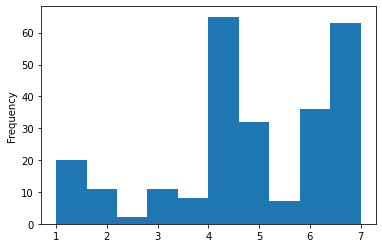

In [61]:
dataframe_concat[dataframe_concat['category']=='movie']['ratings'].plot.hist()

and a `boxplot` for ratings across `categories`:

<AxesSubplot:title={'center':'ratings'}, xlabel='[category]'>

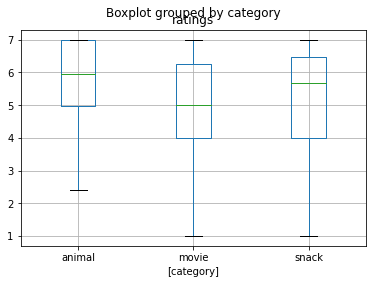

In [62]:
dataframe_concat[['category', 'ratings']].boxplot(by='category')

Sorry, but that's enough spoilers...way more on `data visualization` next week! For now, we should definitely save the `concatenated dataframe` as we need it for everything that follows!

In [63]:
dataframe_concat.to_csv('data_experiment/derivatives/preprocessing/dataframe_group.csv', index=False)

## Outro/Q&A

What we went through in this session was intended as a super small showcase of working with certain `data formats` and `files` in `python`, specifically using `pandas` which we only just started to explore and has way more functionality. 

Sure: this was a very specific use case and `data` but the steps and underlying principles are transferable to the majority of `data handling/wrangling` problems/tasks you might encounter. As always: make sure to check the fantastic docs of the python module you're using (https://pandas.pydata.org/), as well as all the fantastic tutorials out there. 

We can explore its `functions` via `pd.` and then using `tab completion`.

In [ ]:
pd.

#### The core Python "data science" stack
* The Python ecosystem contains tens of thousands of packages
* Several are very widely used in data science applications:
    * [Jupyter](http://jupyter.org): interactive notebooks
    * [Numpy](http://numpy.org): numerical computing in Python
    * [pandas](http://pandas.pydata.org/): data structures for Python
    * [Scipy](http://scipy.org): scientific Python tools
    * [Matplotlib](http://matplotlib.org): plotting in Python
    * [scikit-learn](http://scikit-learn.org): machine learning in Python
* We'll cover the first three very briefly here
    * Other tutorials will go into greater detail on most of the others

#### The core "Python for psychology" stack
* The `Python ecosystem` contains tens of thousands of `packages`
* Several are very widely used in psychology research:
    * [Jupyter](http://jupyter.org): interactive notebooks
    * [Numpy](http://numpy.org): numerical computing in `Python`
    * [pandas](http://pandas.pydata.org/): data structures for `Python`
    * [Scipy](http://scipy.org): scientific `Python` tools
    * [Matplotlib](http://matplotlib.org): plotting in `Python`
    * [seaborn](https://seaborn.pydata.org/index.html): plotting in `Python`
    * [scikit-learn](http://scikit-learn.org): machine learning in `Python`
    * [statsmodels](https://www.statsmodels.org/stable/index.html): statistical analyses in `Python`
    * [pingouin](https://pingouin-stats.org/): statistical analyses in `Python`
    * [psychopy](https://www.psychopy.org/): running experiments in `Python`
    * [nilearn](https://nilearn.github.io/stable/index.html): brain imaging analyses in `Python``
    * [mne](https://mne.tools/stable/index.html): electrophysiology analyses in `Python` 
* Execept `scikit-learn`, `nilearn` and `mne`, we'll cover all very briefly in this course
    * there are many free tutorials online that will go into greater detail and also cover the other `packages`

## Homework assignment #8

Your eight homework assignment will entail working through a few tasks covering the contents discussed in this session within of a `jupyter notebook`. You can download it [here](https://www.dropbox.com/s/tvnatrn1lxnw0gv/PFP_assignment_8_intro_analyzes.ipynb?dl=1). In order to open it, put the `homework assignment notebook` within the folder you stored the `course materials`, start a `jupyter notebook` as during the sessions, navigate to the `homework assignment notebook`, open it and have fun!  

**Deadline: 02/02/2022, 11:59 PM EST**